In [1]:
import numpy as np, matplotlib.pyplot as plt, os

In [2]:
import scipy.io as sio

In [3]:
cwd = os.getcwd()

In [4]:
Pavia_scene_dir = os.path.join(cwd, "MAT Files", "Pavia.mat")

In [5]:
PaviaSc_gt_dir = os.path.join(cwd, "GT Files", "Pavia_gt.mat")

In [6]:
print(Pavia_scene_dir)

/Users/suhasmathey/Hyper_Spectral Imaging/Hyper-Spectral-Image-Analysis/MAT Files/Pavia.mat


In [7]:
PaviaSc_data_mat = sio.loadmat(Pavia_scene_dir)

In [8]:
PaviaSc_gt_mat = sio.loadmat(PaviaSc_gt_dir)


## Pavia - Ground Truth Data

In [9]:
PaviaSc_gt_mat['pavia_gt']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Pavia Data Matrix

In [10]:
PaviaSc_data_mat['pavia']

array([[[ 854,  601,  350, ..., 3664, 3636, 3643],
        [ 527,  642,  575, ..., 3834, 3725, 3768],
        [ 374,  322,  179, ..., 4318, 4311, 4321],
        ...,
        [ 367,  432,  461, ..., 2582, 2504, 2512],
        [ 261,  311,  366, ..., 2269, 2174, 2163],
        [1059,  678,  403, ..., 2245, 2135, 2136]],

       [[1060,  909,  596, ..., 2963, 2967, 2974],
        [ 707,  757,  646, ..., 3508, 3534, 3648],
        [ 143,  419,  417, ..., 4650, 4612, 4638],
        ...,
        [ 465,  547,  537, ..., 3156, 3052, 3035],
        [ 884,  615,  401, ..., 2792, 2667, 2639],
        [ 756,  401,  213, ..., 2600, 2484, 2445]],

       [[ 532,  545,  594, ..., 1675, 1653, 1680],
        [ 523,  491,  321, ..., 3339, 3349, 3403],
        [ 816,  681,  369, ..., 4627, 4600, 4650],
        ...,
        [ 408,  539,  436, ..., 3099, 3005, 3006],
        [ 393,  447,  476, ..., 3172, 3048, 3032],
        [ 798,  615,  489, ..., 3039, 2876, 2800]],

       ...,

       [[ 689,  560,  70

In [11]:
data = PaviaSc_data_mat['pavia']

In [12]:
gt_data = PaviaSc_gt_mat['pavia_gt']

In [13]:
indices = np.where(gt_data == 0)

In [14]:
bg_indices = list(zip(indices[0], indices[1]))

**Create a mask to remove the background pixels**

In [15]:
mask = gt_data != 0 

In [16]:
masked_data = data[mask, :]

In [17]:
masked_data.shape

(148152, 102)

In [18]:
n_classes = np.max(gt_data) + 1

In [23]:
cmap = plt.get_cmap("viridis", n_classes)

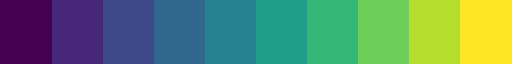

In [24]:
cmap

In [25]:
norm = plt.Normalize(vmin=0, vmax=n_classes)

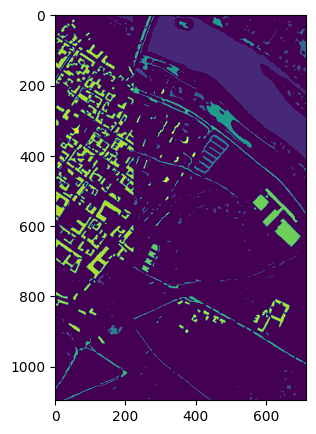

In [26]:
plt.figure(figsize=(5, 5))
plt.imshow(gt_data, cmap=cmap)
plt.show()

In [52]:
data.shape[0]

1096

In [57]:
data_mat = data.reshape(-1, data.shape[2]).T

In [58]:
data_mat.shape

(102, 783640)

In [69]:
gt_vec = gt_data.flatten()

In [70]:
np.sort(np.unique(gt_vec))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [87]:
indices = np.where(gt_vec == 1)[0]

In [94]:
len(indices)

65971

In [96]:
indices[1]

162

In [104]:
rand_idx1 = np.random.choice(indices, 300, False)

In [105]:
len(rand_idx1)

300

In [106]:
rand_idx1

array([ 46139, 129869,  55334,   6081, 180815, 167243,  44107,  89772,
        31738, 125691, 149220, 127832, 145127,  66214,  74748,  48959,
        75479, 124152, 211508,  65535,  92685,    191, 236589,  77631,
       175058, 215825,  87745, 218743,  54702, 106208,  30444,  71823,
       189389,  78505,  80484,  18213,  94933,   1735,  45524, 190053,
       216638,  45371,  40415,  14618,  28194,  94867,  12550, 232998,
         6653,   5216, 155051, 213676,  88531,  39062, 219465,  38296,
        56097,  22450,  54009,  94936,  59702,  48353, 221599, 273101,
       186489, 230137,  77655,  63918, 150780, 263824,  46257,  92573,
       180718, 223759, 101958, 238090, 113544, 107870,  52640, 166498,
         8912,  76780, 135731,  36824, 263803, 117110,  48182,  50356,
        23277,  69101, 112892, 132830,  71827, 240945,  46899,  88495,
       190812, 244469,  26151,  79922, 159965, 107816, 162822, 111926,
       192285,  74635, 206609,    926, 157097, 220119, 122019,   6776,
      

In [108]:
selec_data = data_mat[:, rand_idx1]

In [111]:
selec_data.shape

(102, 300)

In [112]:
mean_vector = np.mean(selec_data, axis=1)

In [114]:
mean_vector.shape

(102,)

## Mean Classifier

In [34]:
class MeanClassifier:
    def __init__(self, mean_vectors):

        """
        Parameters:
            mean_vectors: List containing the mean vector for each valid label.
        """
        
        self.mean_vectors = mean_vectors

In [115]:
def fit_mean(data, gt_data):

    """
    Parameters:
        data: A 3D array of shape (height, width, bands) representing the data cube
        gt_data: A 2D array of shape (height, width) representing the ground truth labels, 0 reperesenting the background
    """

    data_mat = data.reshape(-1, data.shape[2]).T
    gt_vec = gt_data.flatten()
    gt_labels = np.sort(np.unique(gt_vec))
    valid_labels = gt_labels[gt_labels != 0]

    mean_vectors = []
    for label in valid_labels:
        indices = np.where(gt_vec == label)[0]

        idx_size = min(3000, len(indices))

        selected_indices = np.random.choice(indices, idx_size, False)
        selected_points = data_mat[:, selected_indices]

        mean_vector = np.mean(selected_points, axis=1)
        mean_vectors.append(mean_vector)

    return MeanClassifier(mean_vectors)